# Шаг №1. Описание датасета

Архив содержит в себе данные о рейтингах фильмов и отзывов о них 

In [1]:
! wget --no-check-certificate -O /tmp/dataset.zip https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2021-04-01 04:36:00--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>] 955.28K  5.75MB/s    in 0.2s    

2021-04-01 04:36:00 (5.75 MB/s) - ‘/tmp/dataset.zip’ saved [978202/978202]



In [2]:
! unzip /tmp/dataset.zip

Archive:  /tmp/dataset.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
tags_df = pd.read_csv('ml-latest-small/tags.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [5]:
tags_df.info()
print("-------------------------------------------------------------------")
tags_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
-------------------------------------------------------------------


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
ratings_df.info()
print("-------------------------------------------------------------------")
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
-------------------------------------------------------------------


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies_df.info()
print("-------------------------------------------------------------------")
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
-------------------------------------------------------------------


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Шаг №2. Графическое отображение данных

Данные получены. Необходимо теперь рассмотреть их распределение

In [8]:
movies_df_changed = movies_df

In [9]:
movies_df_changed['genres'] = movies_df_changed['genres'].apply(lambda x: x.split('|'))

In [10]:
movies_df_changed.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [11]:
movies_df_agg = movies_df_changed.explode('genres')

In [12]:
movies_df_agg.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [13]:
movies_df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22084 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  22084 non-null  int64 
 1   title    22084 non-null  object
 2   genres   22084 non-null  object
dtypes: int64(1), object(2)
memory usage: 690.1+ KB


In [14]:
value_counts = movies_df_agg.value_counts(subset=['genres'], sort=False)

genres_value_counts = pd.DataFrame(value_counts)
movie_genre_df = genres_value_counts.reset_index()

movie_genre_df.columns = ['genre', 'count_value']
movie_genre_final_df = movie_genre_df.drop(movie_genre_df[movie_genre_df["genre"] == '(no genres listed)'].index)

movie_genre_final_df.head()

,genre,count_value
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756


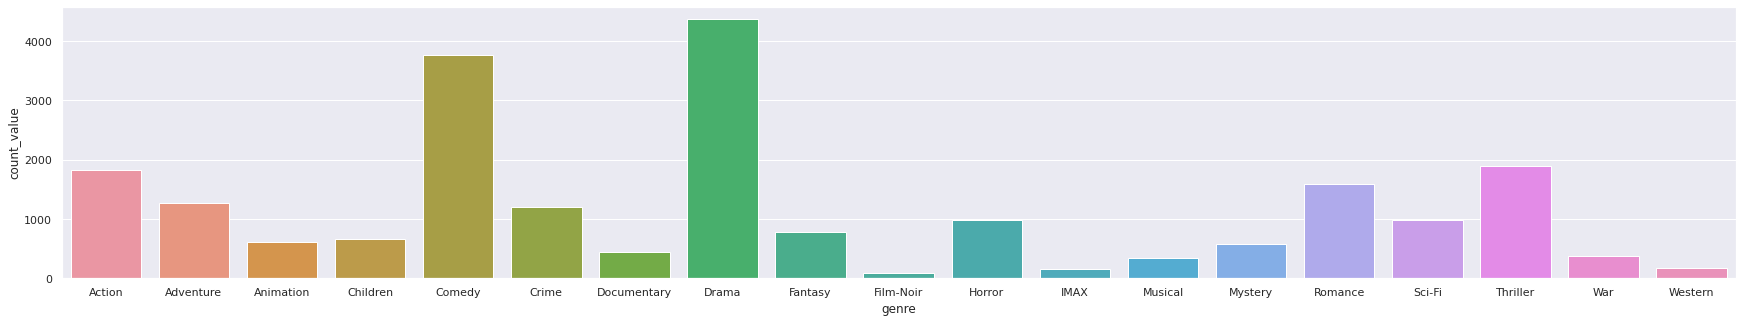

In [15]:
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x = 'genre', y = 'count_value', data = movie_genre_final_df)

In [16]:
value_counts = ratings_df.value_counts(subset = ['userId'], sort=True)

rating_value_counts = pd.DataFrame(value_counts)
rating_user_df = rating_value_counts.reset_index()

rating_user_df.columns = ['user', 'count_value']

rating_user_df.head()


,user,count_value
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346


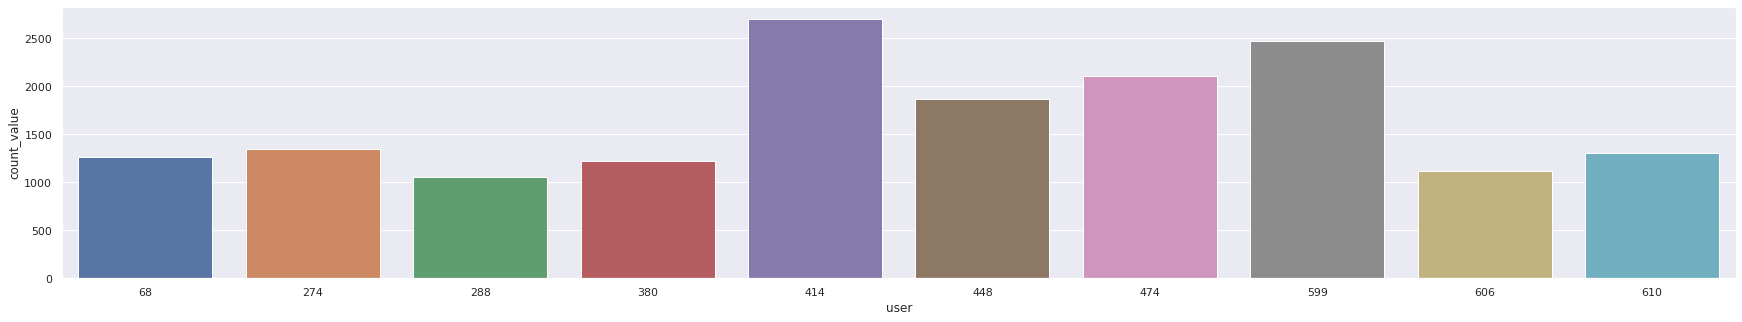

In [17]:
ratings_limited_df = rating_user_df.iloc[0:10]
sns.barplot(x = 'user', y = 'count_value', data = ratings_limited_df)

In [18]:
ratings_raw_limited_df = ratings_df.iloc[0:10]

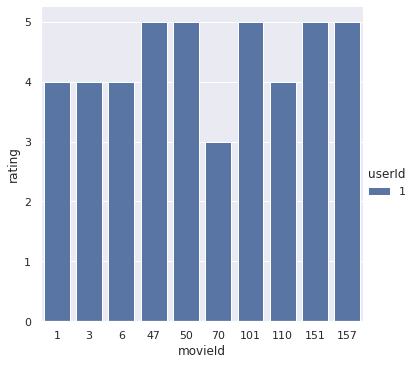

In [19]:
sns.set(rc={'figure.figsize':(100,100)})
sns.catplot(kind='bar', data = ratings_raw_limited_df, hue="userId", x="movieId", y="rating")

# Шаг №3. Модели для анализа

С помощью графиков были рассмотрены имеющиеся признаки для данных. Далее, нужно их анализировать

# Обработка отзывов пользователей

Обработка информации по отзывам пользователей. Для этого будет использован TF - IDF.

In [20]:
import numpy as np
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [21]:
class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [22]:
tags_df.info()
print("-------------------------------------------------------------------")
tags_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
-------------------------------------------------------------------


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [23]:
docs_per_class = tags_df.groupby(['movieId'], as_index=False).agg({'tag': ' '.join})

In [24]:
type(docs_per_class)

pandas.core.frame.DataFrame

In [25]:
docs_per_class.head()

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


In [26]:
docs_per_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  1572 non-null   int64 
 1   tag      1572 non-null   object
dtypes: int64(1), object(1)
memory usage: 36.8+ KB


In [27]:
count = CountVectorizer().fit_transform(docs_per_class['tag'])

In [28]:
count

<1572x1744 sparse matrix of type '<class 'numpy.int64'>'
	with 5260 stored elements in Compressed Sparse Row format>

In [29]:
class_tf_idf = CTFIDFVectorizer().fit_transform(count, n_samples=len(tags_df[['movieId', 'tag']]))

In [30]:
class_tf_idf

<1572x1744 sparse matrix of type '<class 'numpy.float64'>'
	with 5260 stored elements in Compressed Sparse Row format>

In [31]:
class_tf_idf_array = class_tf_idf.toarray()

In [32]:
vectorizer = CountVectorizer().fit(docs_per_class['tag'])

In [33]:
count_transform = vectorizer.transform(docs_per_class['tag'])

In [34]:
words = vectorizer.get_feature_names()

In [35]:
ctfidf = CTFIDFVectorizer().fit_transform(count_transform, n_samples=len(tags_df[['movieId', 'tag']])).toarray()

In [36]:
len(words)

1744

In [37]:
words_per_movie_id = {
    label: [
            words[index] for index in ctfidf[label].argsort()[-10:]
    ] for label in docs_per_class.movieId if label <= 1572
}

In [38]:
type(words_per_movie_id)

dict

In [39]:
words_per_movie_df = pd.DataFrame.from_dict(words_per_movie_id, orient='index').transpose()

In [40]:
words_per_movie_df.head()

,1,2,3,5,7,11,14,16,17,21,22,25,26,28,29,31,32,34,36,38,39,40,41,43,45,46,47,50,52,58,62,92,96,101,104,107,110,111,116,122,...,1354,1356,1357,1358,1361,1363,1366,1367,1372,1374,1376,1377,1380,1381,1387,1389,1393,1394,1396,1398,1407,1408,1411,1413,1416,1423,1441,1446,1449,1466,1474,1485,1496,1500,1513,1537,1542,1544,1545,1569
0,financial,first,fingered,fingered,firefly,fish,firefly,mindfuck,good,fincher,firefly,first,financial,firefly,firefly,fingered,first,financial,inspirational,firefly,fish,firefly,fingered,firefly,first,fingered,first,firefly,first,firefly,first,firefly,first,firefly,first,firefly,firefly,fingered,first,firefly,...,fingered,firefly,first,fingered,mystery,paul,financial,surreal,fingered,films,firefly,kids,fish,fingered,first,first,visually,fincher,financial,financial,filmed,first,financial,fish,flood,future,films,firefly,firefly,fingered,fincher,fincher,new,financial,fingered,firefly,fingered,firefly,fingered,films
1,films,firefly,fincher,fincher,fingered,first,fingered,remake,story,financial,fingered,firefly,films,fingered,fingered,fincher,firefly,films,epic,fingered,first,fingered,first,fingered,firefly,fincher,fingered,fingered,firefly,fingered,firefly,fingered,firefly,fingered,firefly,fingered,fingered,fincher,firefly,fingered,...,fincher,fingered,firefly,fincher,tom,fairy,films,fantasy,fincher,flick,fingered,one,first,on,firefly,firefly,appealing,financial,films,films,francis,firefly,films,first,gold,development,filmed,fingered,fingered,fincher,financial,financial,predictable,films,fincher,cinematography,fincher,fingered,fincher,filmed
2,family,fingered,financial,financial,fincher,firefly,fincher,brad,animal,films,fincher,fingered,filmed,fincher,fincher,financial,fingered,filmed,gibson,fincher,firefly,fincher,firefly,fincher,fingered,financial,zooey,fincher,fingered,fincher,fingered,fincher,fingered,fincher,fingered,fincher,fincher,financial,fingered,fincher,...,financial,fincher,fingered,financial,hanks,night,filmed,will,financial,financial,fincher,everyone,firefly,based,fingered,fingered,cerebral,films,filmed,filmed,franchise,fingered,filmed,firefly,surreal,simon,film,fincher,fincher,financial,films,films,writing,flood,financial,leonardo,financial,fincher,financial,film
3,far,fincher,films,films,financial,fingered,financial,pitt,not,filmed,financial,fincher,film,financial,financial,films,fincher,film,mel,financial,fingered,financial,zooey,financial,fincher,films,new,financial,fincher,financial,fincher,financial,fincher,financial,fincher,financial,financial,films,fincher,financial,...,films,financial,fincher,films,conspiracy,giamatti,film,romance,films,leonardo,financial,something,fingered,creepy,fincher,fincher,gritty,filmed,film,flood,france,fincher,flood,fingered,creepy,pegg,fish,financial,financial,films,flood,filmed,dystopia,witty,films,tom,films,financial,films,fillion
4,fantasy,financial,filmed,filmed,films,fincher,films,willis,for,film,films,financial,flick,films,films,filmed,financial,flood,scenery,films,fincher,films,leonardo,films,financial,filmed,york,films,financial,films,financial,films,financial,films,financial,films,films,filmed,financial,films,...,filmed,films,financial,filmed,hunt,shyamalan,flood,ferrell,filmed,dicaprio,films,plan,fincher,paranoia,financial,financial,long,flood,flick,zooey,comedy,financial,surreal,fincher,fairy,cuts,stylized,films,films,filmed,military,food,anti,seth,filmed,survival,filmed,films,filmed,flick


In [41]:
len(words_per_movie_df.columns)

409

In [42]:
new_columns = {elem: f"movie_id_{elem}" for elem in list(words_per_movie_df.columns)}

In [43]:
words_per_movie_df.rename(columns=new_columns, inplace=True)

In [44]:
words_per_movie_df.head()

,movie_id_1,movie_id_2,movie_id_3,movie_id_5,movie_id_7,movie_id_11,movie_id_14,movie_id_16,movie_id_17,movie_id_21,movie_id_22,movie_id_25,movie_id_26,movie_id_28,movie_id_29,movie_id_31,movie_id_32,movie_id_34,movie_id_36,movie_id_38,movie_id_39,movie_id_40,movie_id_41,movie_id_43,movie_id_45,movie_id_46,movie_id_47,movie_id_50,movie_id_52,movie_id_58,movie_id_62,movie_id_92,movie_id_96,movie_id_101,movie_id_104,movie_id_107,movie_id_110,movie_id_111,movie_id_116,movie_id_122,...,movie_id_1354,movie_id_1356,movie_id_1357,movie_id_1358,movie_id_1361,movie_id_1363,movie_id_1366,movie_id_1367,movie_id_1372,movie_id_1374,movie_id_1376,movie_id_1377,movie_id_1380,movie_id_1381,movie_id_1387,movie_id_1389,movie_id_1393,movie_id_1394,movie_id_1396,movie_id_1398,movie_id_1407,movie_id_1408,movie_id_1411,movie_id_1413,movie_id_1416,movie_id_1423,movie_id_1441,movie_id_1446,movie_id_1449,movie_id_1466,movie_id_1474,movie_id_1485,movie_id_1496,movie_id_1500,movie_id_1513,movie_id_1537,movie_id_1542,movie_id_1544,movie_id_1545,movie_id_1569
0,financial,first,fingered,fingered,firefly,fish,firefly,mindfuck,good,fincher,firefly,first,financial,firefly,firefly,fingered,first,financial,inspirational,firefly,fish,firefly,fingered,firefly,first,fingered,first,firefly,first,firefly,first,firefly,first,firefly,first,firefly,firefly,fingered,first,firefly,...,fingered,firefly,first,fingered,mystery,paul,financial,surreal,fingered,films,firefly,kids,fish,fingered,first,first,visually,fincher,financial,financial,filmed,first,financial,fish,flood,future,films,firefly,firefly,fingered,fincher,fincher,new,financial,fingered,firefly,fingered,firefly,fingered,films
1,films,firefly,fincher,fincher,fingered,first,fingered,remake,story,financial,fingered,firefly,films,fingered,fingered,fincher,firefly,films,epic,fingered,first,fingered,first,fingered,firefly,fincher,fingered,fingered,firefly,fingered,firefly,fingered,firefly,fingered,firefly,fingered,fingered,fincher,firefly,fingered,...,fincher,fingered,firefly,fincher,tom,fairy,films,fantasy,fincher,flick,fingered,one,first,on,firefly,firefly,appealing,financial,films,films,francis,firefly,films,first,gold,development,filmed,fingered,fingered,fincher,financial,financial,predictable,films,fincher,cinematography,fincher,fingered,fincher,filmed
2,family,fingered,financial,financial,fincher,firefly,fincher,brad,animal,films,fincher,fingered,filmed,fincher,fincher,financial,fingered,filmed,gibson,fincher,firefly,fincher,firefly,fincher,fingered,financial,zooey,fincher,fingered,fincher,fingered,fincher,fingered,fincher,fingered,fincher,fincher,financial,fingered,fincher,...,financial,fincher,fingered,financial,hanks,night,filmed,will,financial,financial,fincher,everyone,firefly,based,fingered,fingered,cerebral,films,filmed,filmed,franchise,fingered,filmed,firefly,surreal,simon,film,fincher,fincher,financial,films,films,writing,flood,financial,leonardo,financial,fincher,financial,film
3,far,fincher,films,films,financial,fingered,financial,pitt,not,filmed,financial,fincher,film,financial,financial,films,fincher,film,mel,financial,fingered,financial,zooey,financial,fincher,films,new,financial,fincher,financial,fincher,financial,fincher,financial,fincher,financial,financial,films,fincher,financial,...,films,financial,fincher,films,conspiracy,giamatti,film,romance,films,leonardo,financial,something,fingered,creepy,fincher,fincher,gritty,filmed,film,flood,france,fincher,flood,fingered,creepy,pegg,fish,financial,financial,films,flood,filmed,dystopia,witty,films,tom,films,financial,films,fillion
4,fantasy,financial,filmed,filmed,films,fincher,films,willis,for,film,films,financial,flick,films,films,filmed,financial,flood,scenery,films,fincher,films,leonardo,films,financial,filmed,york,films,financial,films,financial,films,financial,films,financial,films,films,filmed,financial,films,...,filmed,films,financial,filmed,hunt,shyamalan,flood,ferrell,filmed,dicaprio,films,plan,fincher,paranoia,financial,financial,long,flood,